# Solutions for 3D solute transport in uniform background flow
This notebook shows some examples of three-dimensional solute transport in uniform background flow. The examples are based on [Wexler (1992)](https://doi.org/10.3133/twri03B7), as is the underlying code.

Solutions for three-dimensional transport can be applied in relatively thick aquifers where both horizontal and vertical concentration spreading is important. A solution for solute transport from a continuous point source in an infinite aquifer is presented, as well as solutions for so-called "patch" sources. These are constant-concentration sources of finite dimensions in a semi-infinite aquifer. The source is placed at `x = 0` and has a finite extent along the y- and z-axes. A meaningful solution exists only downgradient from the source, i.e. for positive x-values. In addition to the solutions provided by [Wexler (1992)](https://doi.org/10.3133/twri03B7), the `pulse3()` simulates 3D solute transport in an infinite aquifer originating from an instantaneous pulse release of mass at an arbitrarily placed point source.


The solutions for transport in uniform background flow are available as functions from the `uniform` module and can be imported and called as:

In [1]:
from adepy.uniform import point3

point3(
    c0=100.0,
    x=[5, 10],
    y=[0, 0],
    z=[-0.5, 0],
    t=60,
    v=0.05,
    n=0.25,
    al=1.0,
    ah=0.1,
    av=0.01,
    Q=1,
    xc=0,
    yc=0,
    zc=0,
)

array([72.16945361,  6.76261728])

## Infinite aquifer with a continuous point source

The `adepy.uniform.point3` algorithm can be used to solve 3D solute transport originating from a continuous point source in an infinite aquifer. A third-type boundary is applied at the point source whereby water with a known, constant concentration is injected at a constant rate. It is assumed that the injection rate is small so that the flow field remains uniform.

As an example, a natural gradient tracer test is simulated, where a pulse injection of chloride was applied in three wells during a one-day period. The wells were screened across a small interval in the aquifer. Superposition in time and space is applied to simulate this problem (see also the [00_uniform_overview.ipynb](./00_uniform_overview.ipynb) notebook for more information about superpositioning). This example corresponds to sample problem 9 in [Wexler (1992)](https://doi.org/10.3133/twri03B7).

In [2]:
# imports used across the examples
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'y (ft)')

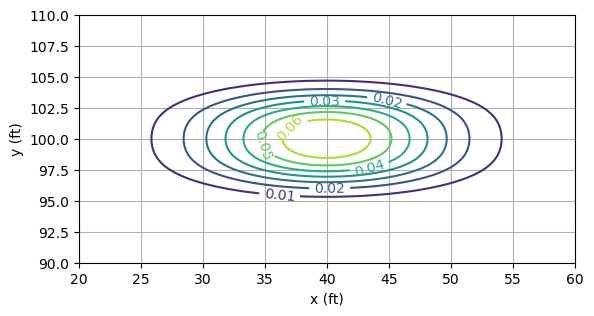

In [3]:
# Import the 3D solution for solute transport for a continuous point source in an infinite aquifer
from adepy.uniform import point3

n = 0.25  # aquifer porosity, -
v = 0.1  # linear groundwater flow velocity, ft/d
al = 0.6  # longitudinal dispersivity, ft
ah = 0.03  # horizontal transverse  dispersivity, ft
av = 0.006  # vertical transverse  dispersivity, ft
c0 = 1000  # injection concentration for each well, mg/L
Q = 1.0  # injection rate for each well, ft³/d
w1 = (0, 98, 10)  # x-y-z coordinates of the first well, ft
w2 = (0, 100, 10)  # x-y-z coordinates of the second well, ft
w3 = (0, 102, 10)  # x-y-z coordinates of the third well, ft

# output x-y coordinates, ft
x, y = np.meshgrid(np.linspace(20, 60, 100), np.linspace(90, 110, 100))
z = 10  # output z-coordinate, ft
t = 400  # output time, d
dt = 1  # pulse duration, d

# to simulate a pulse injection of 1 day, simulate a continuous source for t = total time and
#  subtract the solution for t = total time - 1 day
cw1 = point3(c0, x, y, z, t, v, n, al, ah, av, Q, w1[0], w1[1], w1[2]) - point3(
    c0, x, y, z, t - dt, v, n, al, ah, av, Q, w1[0], w1[1], w1[2]
)

cw2 = point3(c0, x, y, z, t, v, n, al, ah, av, Q, w2[0], w2[1], w2[2]) - point3(
    c0, x, y, z, t - dt, v, n, al, ah, av, Q, w2[0], w2[1], w2[2]
)

cw3 = point3(c0, x, y, z, t, v, n, al, ah, av, Q, w3[0], w3[1], w3[2]) - point3(
    c0, x, y, z, t - dt, v, n, al, ah, av, Q, w3[0], w3[1], w3[2]
)

# to superimpose the three solutions in space, simply add them together
c = cw1 + cw2 + cw3

# plot contours of the normalized concentration
cs = plt.contour(x, y, c / c0)
plt.gca().set_aspect(1.0)
plt.clabel(cs, fmt="%.2f")
plt.grid()
plt.xlabel("x (ft)")
plt.ylabel("y (ft)")

## Bounded aquifer with a patch source

The `adepy.uniform.patchf` algorithm can be used to simulate 3D solute transport originating from a patch source at `x = 0` in a bounded aquifer. The aquifer is finite in the y- and z-directions, and semi-infinite in the x-direction. Impermeable boundaries are placed at the finite ends of the aquifer's y and z-extents, where the concentration gradient across the boundary is fixed at zero so the solute can not pass through. This solution may be valid for aquifers with a limited width, for example embedded in less-permeable or impermeable sediments which are close enough to the source as to affect its spread. 

As an example, chloride migration from a landfill leachate in a gravel pit in a narrow valley-infill aquifer is simulated, corresponding to sample problem 10 in [Wexler (1992)](https://doi.org/10.3133/twri03B7). Note the effect of the impermeable aquifer boundary at `y = 0`. Comparison with [the 2D solution](./02_uniform_2D.ipynb) shows the effect of the vertical concentration spread on the plume shape and the resulting concentrations, illustrating the errors that can occur when simulating 2D solute transport when a 3D solution is more appropriate.

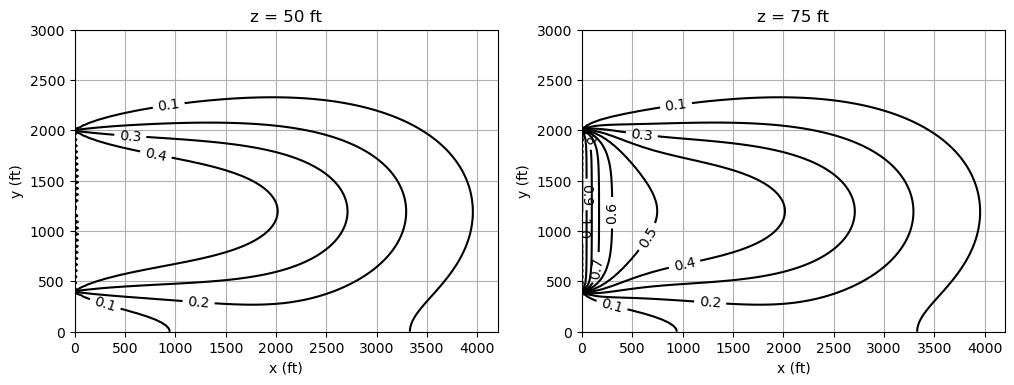

In [4]:
from adepy.uniform import patchf

w = 3000  # aquifer width starting at y = 0, ft
h = 100  # aquifer height starting at z = 0, ft
y1 = 400  # lower y-coordinate for the source, ft
y2 = 2000  # upper y-coordinate for the source, ft
z1 = 50  # lower z-coordinate for the source, ft
z2 = 100  # upper z-coordinate for the source, ft
c0 = 1000  # source concentration, mg/L
v = 1  # uniform background flow velocity, ft/d
al = 200  # longitudinal dispersivity, ft
ah = 60  # horizontal transverse dispersivity, ft
av = 10  # vertical transverse dispersivity, ft

t = 3000  # output time, d
z_levels = [50, 75]  # output z-levels, ft

# output x-y-z coordinates, ft
x, y, z = np.meshgrid(np.linspace(0, 4200, 100), np.linspace(0, 3000, 100), z_levels)

# calculate and plot the normalized concentration contours at two z-elevations
c = patchf(c0, x, y, z, t, v, al, ah, av, w, h, y1, y2, z1, z2, nterm=100)

fig, ax = plt.subplots(1, len(z_levels), figsize=(12, 4))

for i, z in enumerate(z_levels):
    cs = ax[i].contour(
        x[:, :, i],
        y[:, :, i],
        c[:, :, i] / c0,
        colors="black",
        levels=np.arange(0.1, 1.1, 0.1),
    )
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"z = {z} ft")

## Semi-infinite aquifer with a patch source

The resulting 3D concentration field from a patch source placed at `x = 0` in a semi-infinite aquifer can be simulated using `adepy.uniform.patchi`. The aquifer is infinite in the y- and z-directions and in the positive x-direction.

For this problem, [Domenico & Robbins (1985)](https://doi.org/10.1111/j.1745-6584.1985.tb01497.x) and later [Domenico (1987)](https://doi.org/10.1016/0022-1694%2887%2990127-2) provided a popular closed-form solution. Due to the relatively straightforward computation, it has seen widespread use in screening tools, e.g. the BIOCHLOR and BIOSCREEN models of the EPA. However, as shown by i.a. [Srinivasan et al. (2007)](https://doi.org/10.1111/j.1745-6584.2006.00281.x) and [West et al. (2007)](https://doi.org/10.1111/j.1745-6584.2006.00280.x), the Domenico & Robbins solution was derived using an approximate approach and is therefore not accurate for non-zero longitudinal dispersivities. An exact solution for simulating a patch source in a semi-infinite aquifer was derived by [Wexler (1992)](https://doi.org/10.3133/twri03B7) and is implemented here in `adepy.uniform.patchi`.

The example below simulates the fate of a contaminant containing strontium-90 originating from a deep, subterranean radioactive-waste storage facility as it migrates through a thick, confined aquifer (sample problem 11 in [Wexler (1992)](https://doi.org/10.3133/twri03B7)). The species is subjected to first-order radioactive decay.

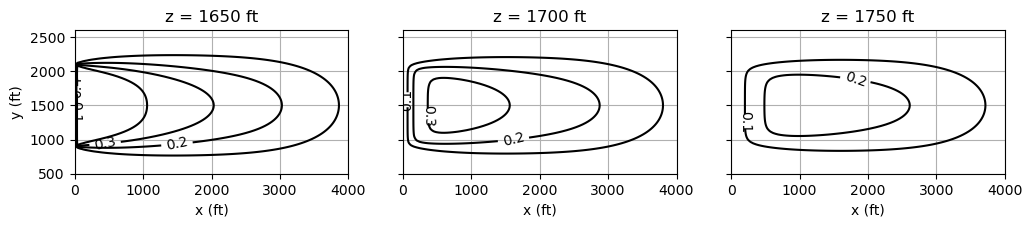

In [5]:
from adepy.uniform import patchi

y1 = 900  # lower y-coordinate for the source, ft
y2 = 2100  # upper y-coordinate for the source, ft
z1 = 1350  # lower z-coordinate for the source, ft
z2 = 1650  # upper z-coordinate for the source, ft
v = 1  # uniform background flow velocity, ft/d
al = 100  # longitudinal dispersivity, ft
ah = 20  # horizontal transverse dispersivity, ft
av = 20  # vertical transverse dispersivity, ft
c0 = 100  # source concentration, mg/L
half_life = 28 * 365  # strontium-90 half-life, d

lamb = np.log(2) / half_life  # first-order decay rate, 1/d

z_elev = [1650, 1700, 1750]  # output z-elevations, ft

# output x-y-z coordinates, ft
x, y, z = np.meshgrid(np.linspace(0, 4000, 100), np.linspace(500, 2600, 100), z_elev)
t = 10 * 365  # output time, d

# calculate the concentrations
c = patchi(c0, x, y, z, t, v, al, ah, av, y1, y2, z1, z2, lamb=lamb)

# plot the normalized concentrations at the three z-elevations
fig, ax = plt.subplots(1, len(z_elev), figsize=(12, 4), sharey=True)

for i, z in enumerate(z_elev):
    cs = ax[i].contour(
        x[:, :, i],
        y[:, :, i],
        c[:, :, i] / c0,
        colors="black",
        levels=np.arange(0.1, 1.1, 0.1),
    )
    ax[i].clabel(cs, fmt="%.1f")
    ax[i].set_aspect(1.0)
    ax[i].set_xlabel("x (ft)")
    if i == 0:
        ax[i].set_ylabel("y (ft)")
    ax[i].grid()
    ax[i].set_title(f"z = {z} ft")

## Infinite system with a pulse source

An instantaneous pulse release of mass from a point source in an infinite 3D system can be simulated with `pulse3()`. The source can be placed anywhere in the system.


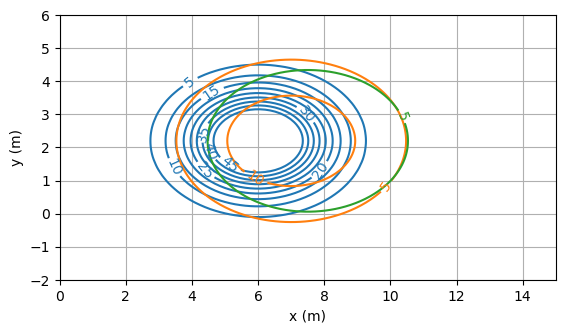

In [6]:
from adepy.uniform.threeD import pulse3

v = 0.05  # linear groundwater flow velocity, m/d
al = 2.0  # longitudinal dispersivity, m
ah = 1.0  # horizontal tranverse dispersivity, m
av = 0.1  # vertical transverse dispersivity, m
n = 0.2  # aquifer porosity, -

m0 = 100  # source mass, mg
xc = 5.5  # x-coordinate of the source, m
yc = 2.2  # y-coordinate of the source, m
zc = 0.0  # z-coordinate of the sourcen m

x, y = np.meshgrid(np.linspace(0, 15, 100), np.linspace(-2, 6, 100))
z = 0.0

c = []
t = [10, 30, 40]
lvls = np.arange(0, 50, 5)

for i, ti in enumerate(t):
    c.append(pulse3(m0, x, y, z, ti, v, n, al, ah, av, xc, yc, zc))
    ca = plt.contour(x, y, c[i], colors=f"C{i}", levels=lvls)
    plt.clabel(ca)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.gca().set_aspect("equal")